## Exploratory Data Analysis of the 'Liver Diseases' dataset.
### Link: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records?datasetId=2607&sortBy=voteCount 

In the dataset, 416 people, are those with liver disease and 167 are healthy. In terms of gender, there are 441 male patients and 142 female patients from the northeastern state of Andhra Pradesh, India. The Outcome column is a class label used to divide the groups into patients with liver disease (liver disease -> 1) or without (no disease -> 0). Any patient whose age exceeded 89 is listed as "90."

11 columns, 583 variables.
Columns:
- Age -> patient's age
- Gender -> gender of the patient
- Total Bilirubin
- Direct Bilirubin 
- Alkaline Phosphotase 
- Alamine Aminotransferase 
- Aspartate Aminotransferase 
- Total Protiens -> total number of proteins 
- Albumin 
- Albumin and Globulin Ratio -> Albumin and globulin ratio 
- Dataset [Outcome]: 1 - patient, 0 - healthy person

Sources:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
# load dataset
liver = pd.read_csv('indian_liver_patient.csv')
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### I rename the Dataset column to Outcome, as in other collections.

In [3]:
liver.rename(columns={'Dataset' : 'Outcome'}, inplace=True)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver['Outcome'].unique()

array([1, 2], dtype=int64)

### I also change the values of 2 (healthy people) to 0, so that it is the same as in other sets.
### 1 - sick person, 0 - healthy person.

In [5]:
liver['Outcome'].replace(2, 0, inplace=True)

In [6]:
liver['Outcome'].unique()

array([1, 0], dtype=int64)

In [7]:
liver.shape # 583 objects, 11 columns

(583, 11)

In [8]:
liver.columns.values

array(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Outcome'], dtype=object)

In [9]:
liver['Outcome'].value_counts() # 416 sick people, 167 healthy people

Outcome
1    416
0    167
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

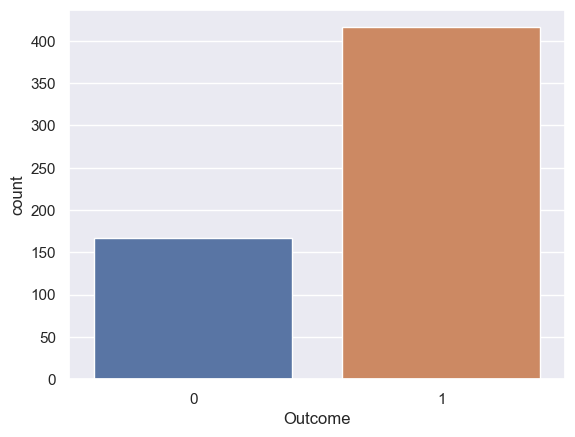

In [10]:
sns.countplot(x = 'Outcome', data = liver)

In [11]:
liver.Gender.value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

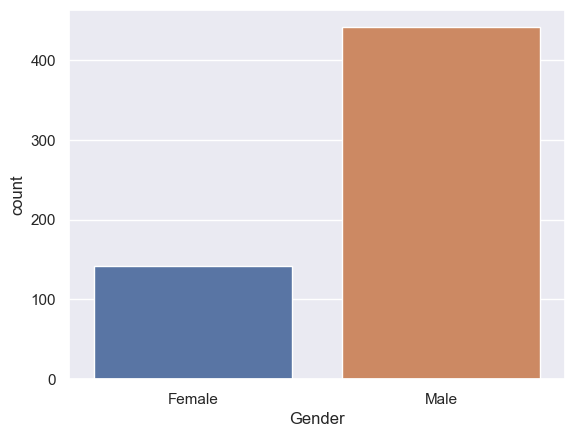

In [12]:
sns.countplot(x = 'Gender', data = liver)

In [13]:
liver.info() # only one variable of type object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [14]:
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Outcome                       0
dtype: int64

### 4 NaN values in Albumin_and_Globulin_Ratio. I'll replace them with 0 to deal with them later.

In [15]:
liver[liver.Albumin_and_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [16]:
liver['Albumin_and_Globulin_Ratio'].fillna(0, inplace = True)
liver['Albumin_and_Globulin_Ratio'] = liver['Albumin_and_Globulin_Ratio'].astype(float)

In [17]:
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Outcome                       0
dtype: int64

In [18]:
liver.isin({0}).sum()

Age                             0
Gender                          0
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkaline_Phosphotase            0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio      4
Outcome                       167
dtype: int64

In [19]:
liver.duplicated().sum()

13

### 13 duplicates.

In [20]:
liver[liver.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,0
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [21]:
liver = liver.drop_duplicates()
print(liver.duplicated().sum())

0


### Removing duplicates

### As there is no more missing data, I can convert object type data into numeric data

In [22]:
# I change the data type 'object' to 'category' so that I can later use the cat.codes method
liver['Gender'] = liver['Gender'].astype('category')
# I change categorical values to numerical values
liver['Gender'] = liver['Gender'].cat.codes
print(liver.info())
print(liver.head())

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    int8   
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Outcome                     570 non-null    int64  
dtypes: float64(5), int64(5), int8(1)
memory usage: 49.5 KB
None
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase   
0   65       0     

### Female -> 0, men -> 1

In [23]:
liver.Gender.value_counts()

Gender
1    430
0    140
Name: count, dtype: int64

In [24]:
liver.shape # 570 objects

(570, 11)

In [25]:
liver.Outcome.value_counts() # 406 sick people, 164 healthy people (more sick people)

Outcome
1    406
0    164
Name: count, dtype: int64

In [26]:
liver.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,570.0,44.85,16.24,4.0,33.0,45.00,58.00,90.0
Gender,570.0,0.75,0.43,0.0,1.0,1.00,1.00,1.0
Total_Bilirubin,570.0,3.32,6.27,0.4,0.8,1.00,2.60,75.0
Direct_Bilirubin,570.0,1.50,2.83,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,570.0,291.75,245.29,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,570.0,79.73,181.47,10.0,23.0,35.00,60.00,2000.0
Aspartate_Aminotransferase,570.0,109.38,290.88,10.0,25.0,41.00,86.75,4929.0
Total_Protiens,570.0,6.50,1.09,2.7,5.8,6.60,7.20,9.6
Albumin,570.0,3.15,0.80,0.9,2.6,3.10,3.80,5.5
Albumin_and_Globulin_Ratio,570.0,0.94,0.33,0.0,0.7,0.93,1.10,2.8


### Statistics:
* Age [Age]: 4 to 90.
* Gender [Gender]: 0 - female, 1 - male
* Total bilirubin level [Total_Bilirubin]: 0.4 to 75.0 
* Direct bilirubin [Direct_Bilirubin]: 0.1 to 19.7 
* Alkaline Phosphotase [Alkaline_Phosphotase]: 63.0 to 2110.0 (outlier).
* Alanine aminotransferase [Alamine_Aminotransferase]: 10.0 to 2000.0 (outlier).
* Aspartate aminotransferase [Aspartate_Aminotransferase]: 10.0 to 4929.0 (outlier)
* Total number of proteins [Total_Protiens]: 2.7 to 9.6
* Albumin [Albumin]: 0.9 to 5.5
* Albumin and globulin ratio [Albumin_and_Globulin_Ratio]: 0 (which I need to address) to 2.8
* Outcome: 0 - healthy person, 1 - sick person.

In [27]:
liver.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     70
Outcome                         2
dtype: int64

### Only two categorical values - gender and outcome

In [28]:
np.sort(liver['Albumin_and_Globulin_Ratio'].unique())

array([0.  , 0.3 , 0.35, 0.37, 0.39, 0.4 , 0.45, 0.46, 0.47, 0.48, 0.5 ,
       0.52, 0.53, 0.55, 0.58, 0.6 , 0.61, 0.62, 0.64, 0.67, 0.68, 0.69,
       0.7 , 0.71, 0.74, 0.75, 0.76, 0.78, 0.8 , 0.87, 0.88, 0.89, 0.9 ,
       0.92, 0.93, 0.95, 0.96, 0.97, 1.  , 1.02, 1.03, 1.06, 1.09, 1.1 ,
       1.11, 1.12, 1.16, 1.18, 1.2 , 1.25, 1.27, 1.3 , 1.34, 1.36, 1.38,
       1.39, 1.4 , 1.5 , 1.51, 1.55, 1.58, 1.6 , 1.66, 1.7 , 1.72, 1.8 ,
       1.85, 1.9 , 2.5 , 2.8 ])

In [29]:
liver.isin({0}).sum()

Age                             0
Gender                        140
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkaline_Phosphotase            0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio      4
Outcome                       164
dtype: int64

### I need to take a closer look at the 0 values.

In [30]:
liver[liver['Albumin_and_Globulin_Ratio'].isin({0})]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
209,45,0,0.9,0.3,189,23,33,6.6,3.9,0.0,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,0.0,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,0.0,0
312,27,1,1.3,0.6,106,25,54,8.5,4.8,0.0,0


### I would remove those records with zero values. There are few of them, so they should not have a significant impact on the analysis.

In [31]:
liver = liver.drop(liver[liver['Albumin_and_Globulin_Ratio'] == 0].index)
liver[liver['Albumin_and_Globulin_Ratio'].isin({0})]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome


### Now I have to deal with outliers.

In [32]:
# Division of data into numeric and categorical data
categorical = liver[['Gender', 'Outcome']]
numerical = liver[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 
                   'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
numerical_outcome = liver[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 
                   'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Outcome']]

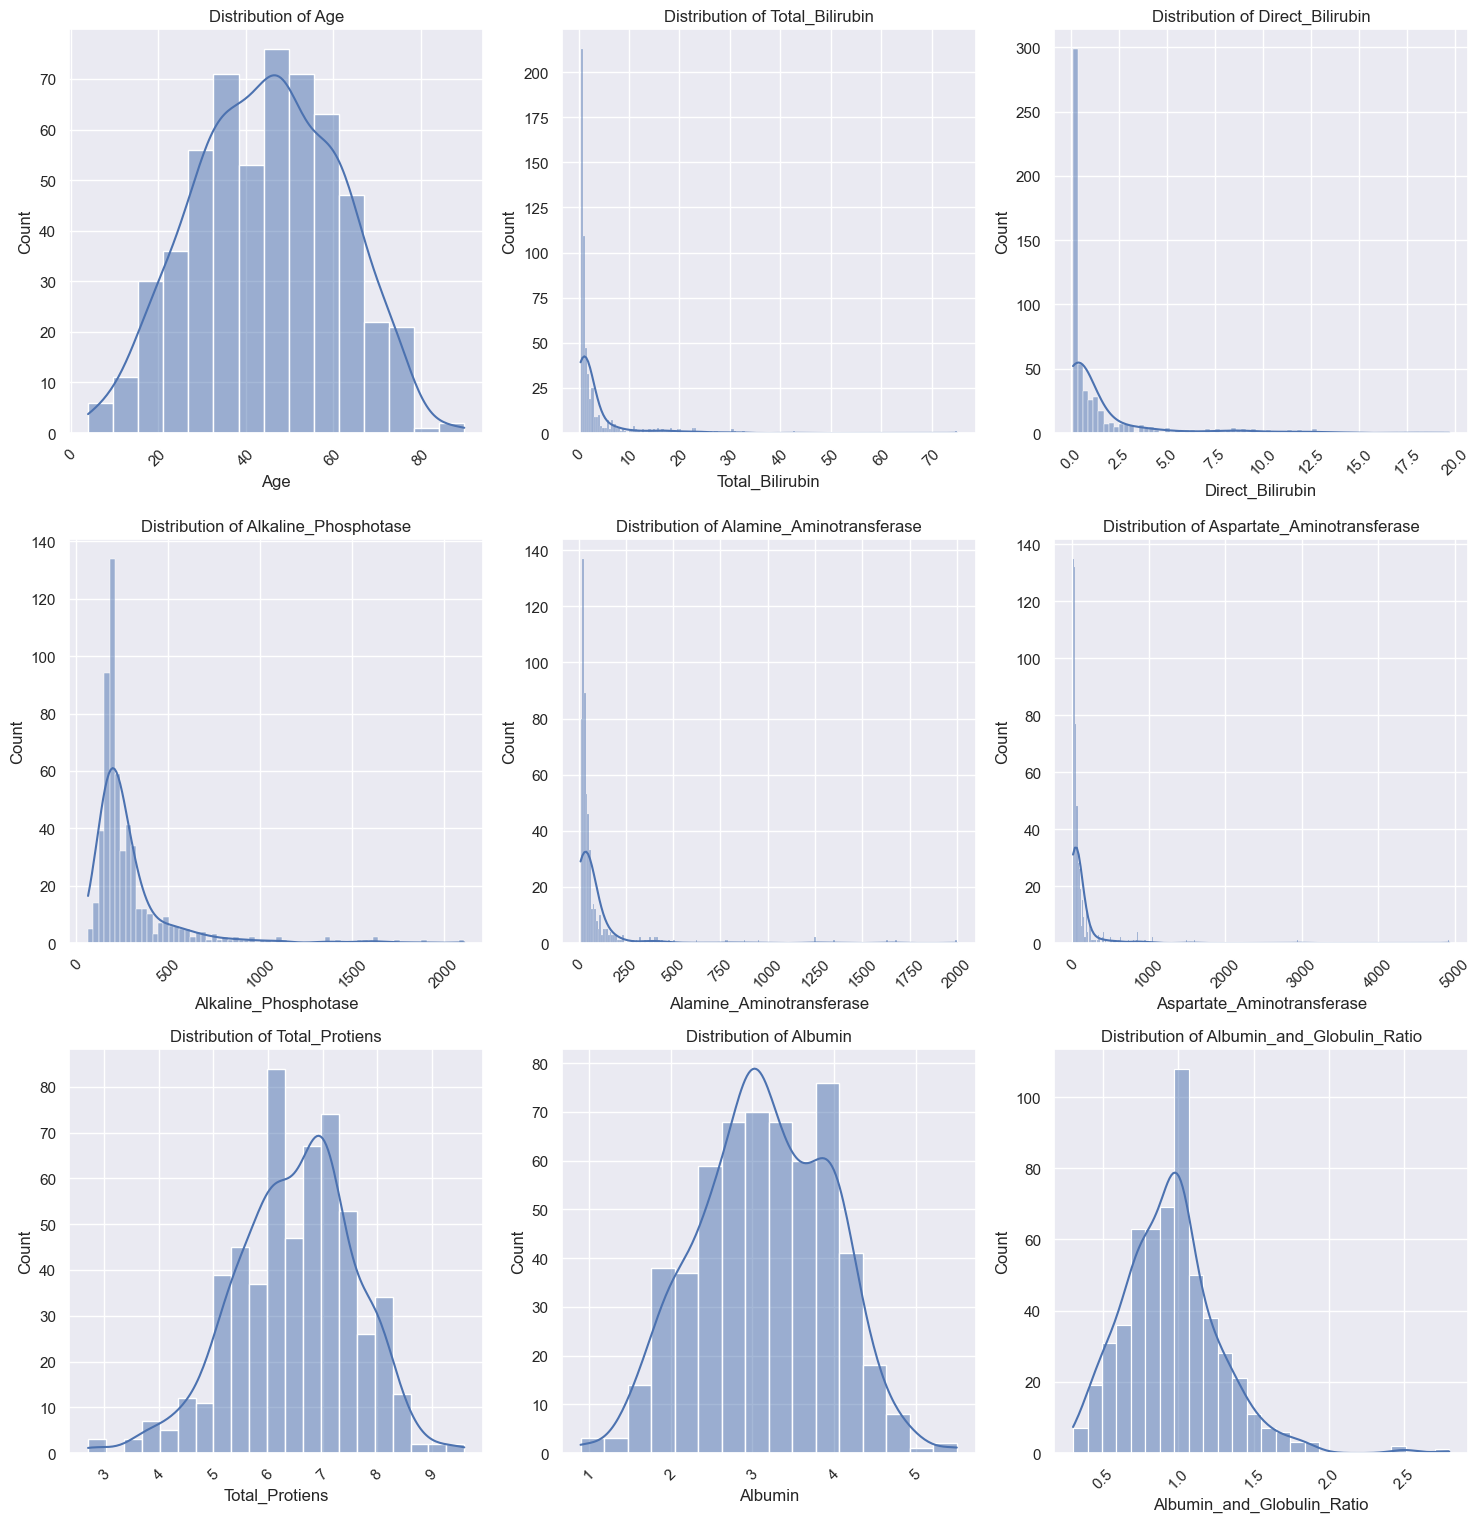

In [33]:
num_columns = len(numerical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(numerical.columns):
    plt.subplot(num_rows, 3, idx + 1)
    sns.histplot(data=numerical, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()

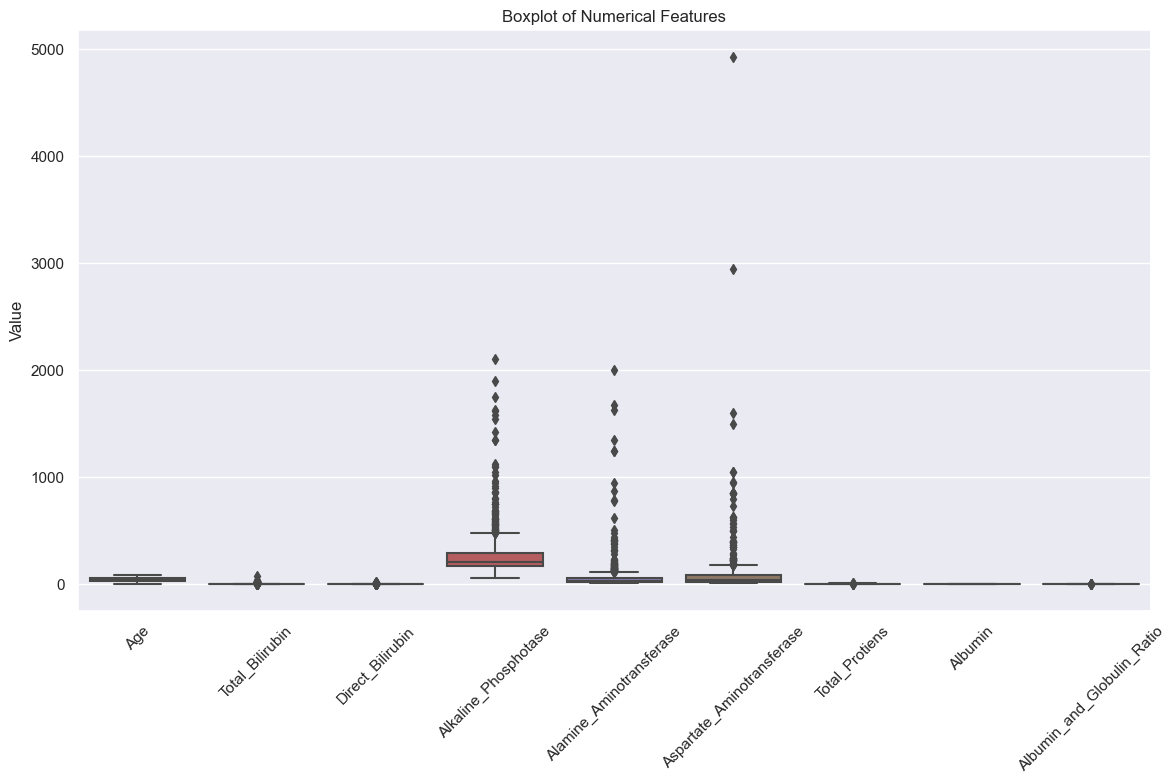

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical)
plt.title('Boxplot of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()

### It can be observed that alamine aminotransferase has two very outlying values.

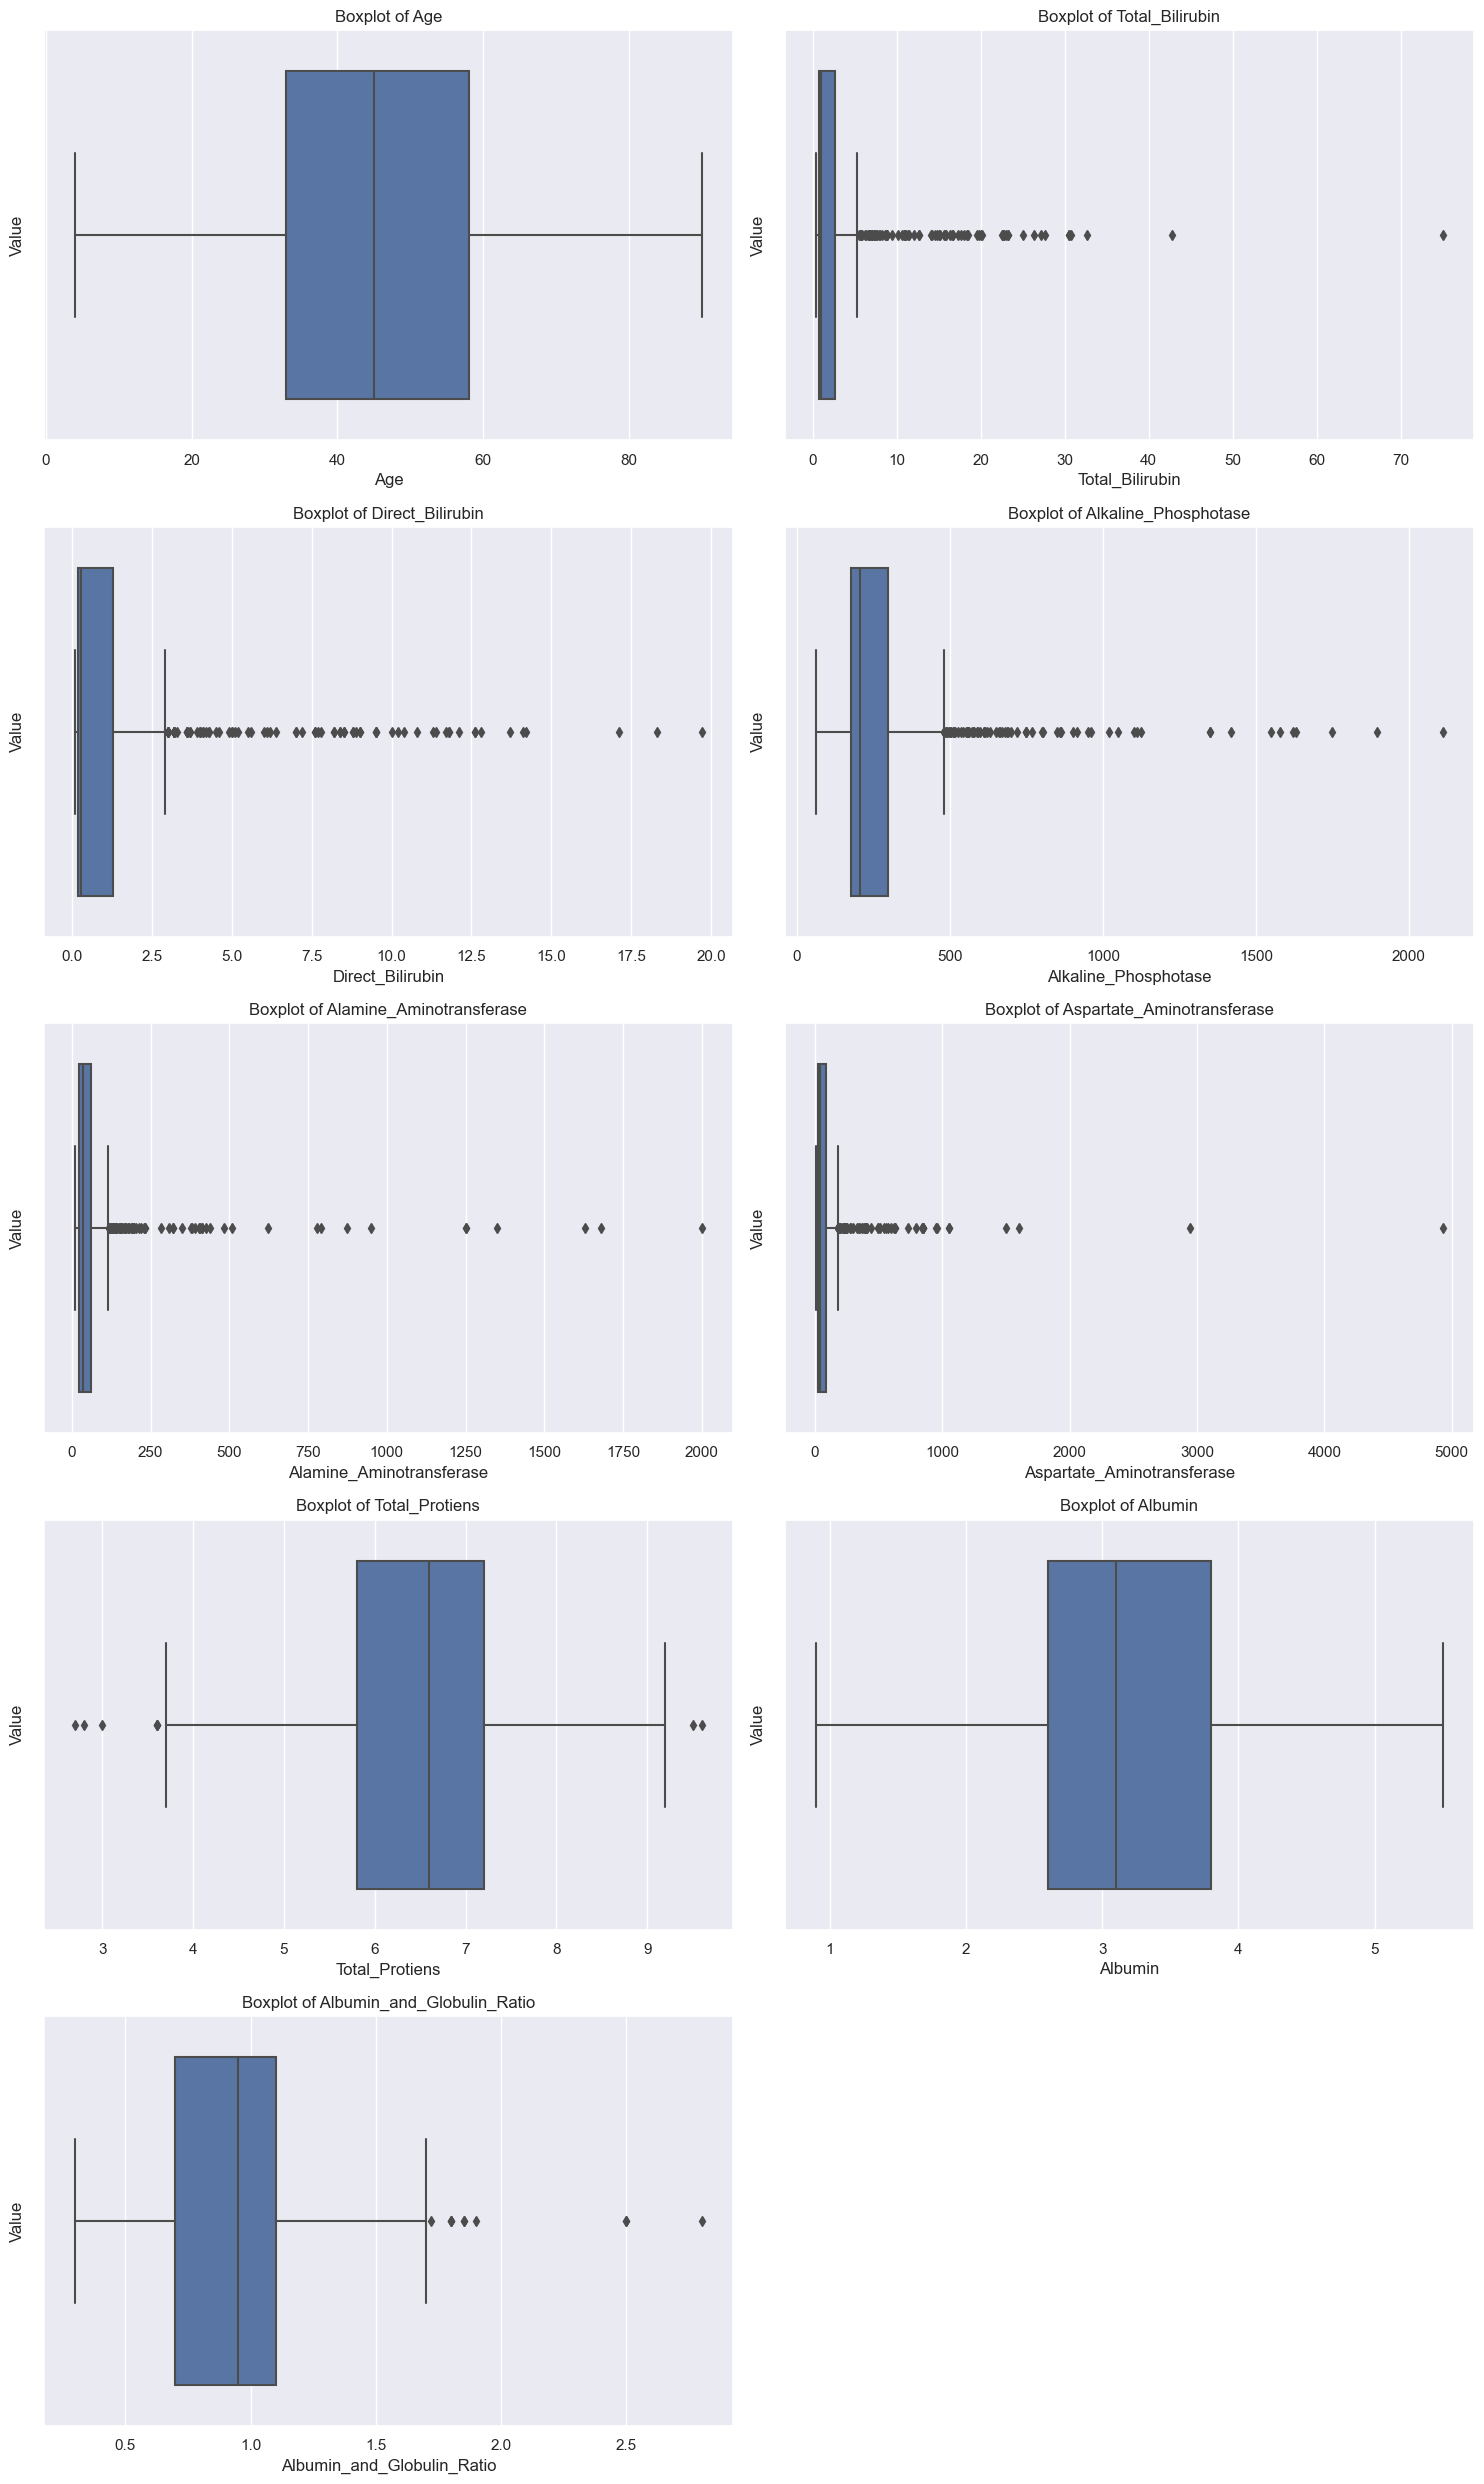

In [35]:
num_columns = len(numerical.columns)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(15, num_rows * 5))

for idx, column in enumerate(numerical.columns):
    plt.subplot(num_rows, 2, idx + 1)
    sns.boxplot(data=numerical, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()

In [36]:
liver.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,566.0,44.89,16.27,4.0,33.0,45.00,58.00,90.0
Gender,566.0,0.76,0.43,0.0,1.0,1.00,1.00,1.0
Total_Bilirubin,566.0,3.34,6.29,0.4,0.8,1.00,2.60,75.0
Direct_Bilirubin,566.0,1.51,2.84,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,566.0,292.57,245.94,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,566.0,80.14,182.04,10.0,23.0,35.00,60.75,2000.0
Aspartate_Aminotransferase,566.0,109.89,291.84,10.0,25.0,41.00,87.00,4929.0
Total_Protiens,566.0,6.49,1.09,2.7,5.8,6.60,7.20,9.6
Albumin,566.0,3.15,0.80,0.9,2.6,3.10,3.80,5.5
Albumin_and_Globulin_Ratio,566.0,0.95,0.32,0.3,0.7,0.95,1.10,2.8


In [37]:
liver[liver['Aspartate_Aminotransferase'].isin([2946, 4929, 1600])]# all results are for sick people, so it is possible that these are not errors, but values that indicate that a given patient is sick

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
117,32,1,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1
118,32,1,15.9,7.0,280,1350,1600,5.6,2.8,1.0,1
135,66,1,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1


In [38]:
liver[liver['Total_Bilirubin'] == 75.0] # probable

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
166,55,1,75.0,3.6,332,40,66,6.2,2.5,0.6,1


In [39]:
# np.sort(liver['Aspartate_Aminotransferase'].unique())

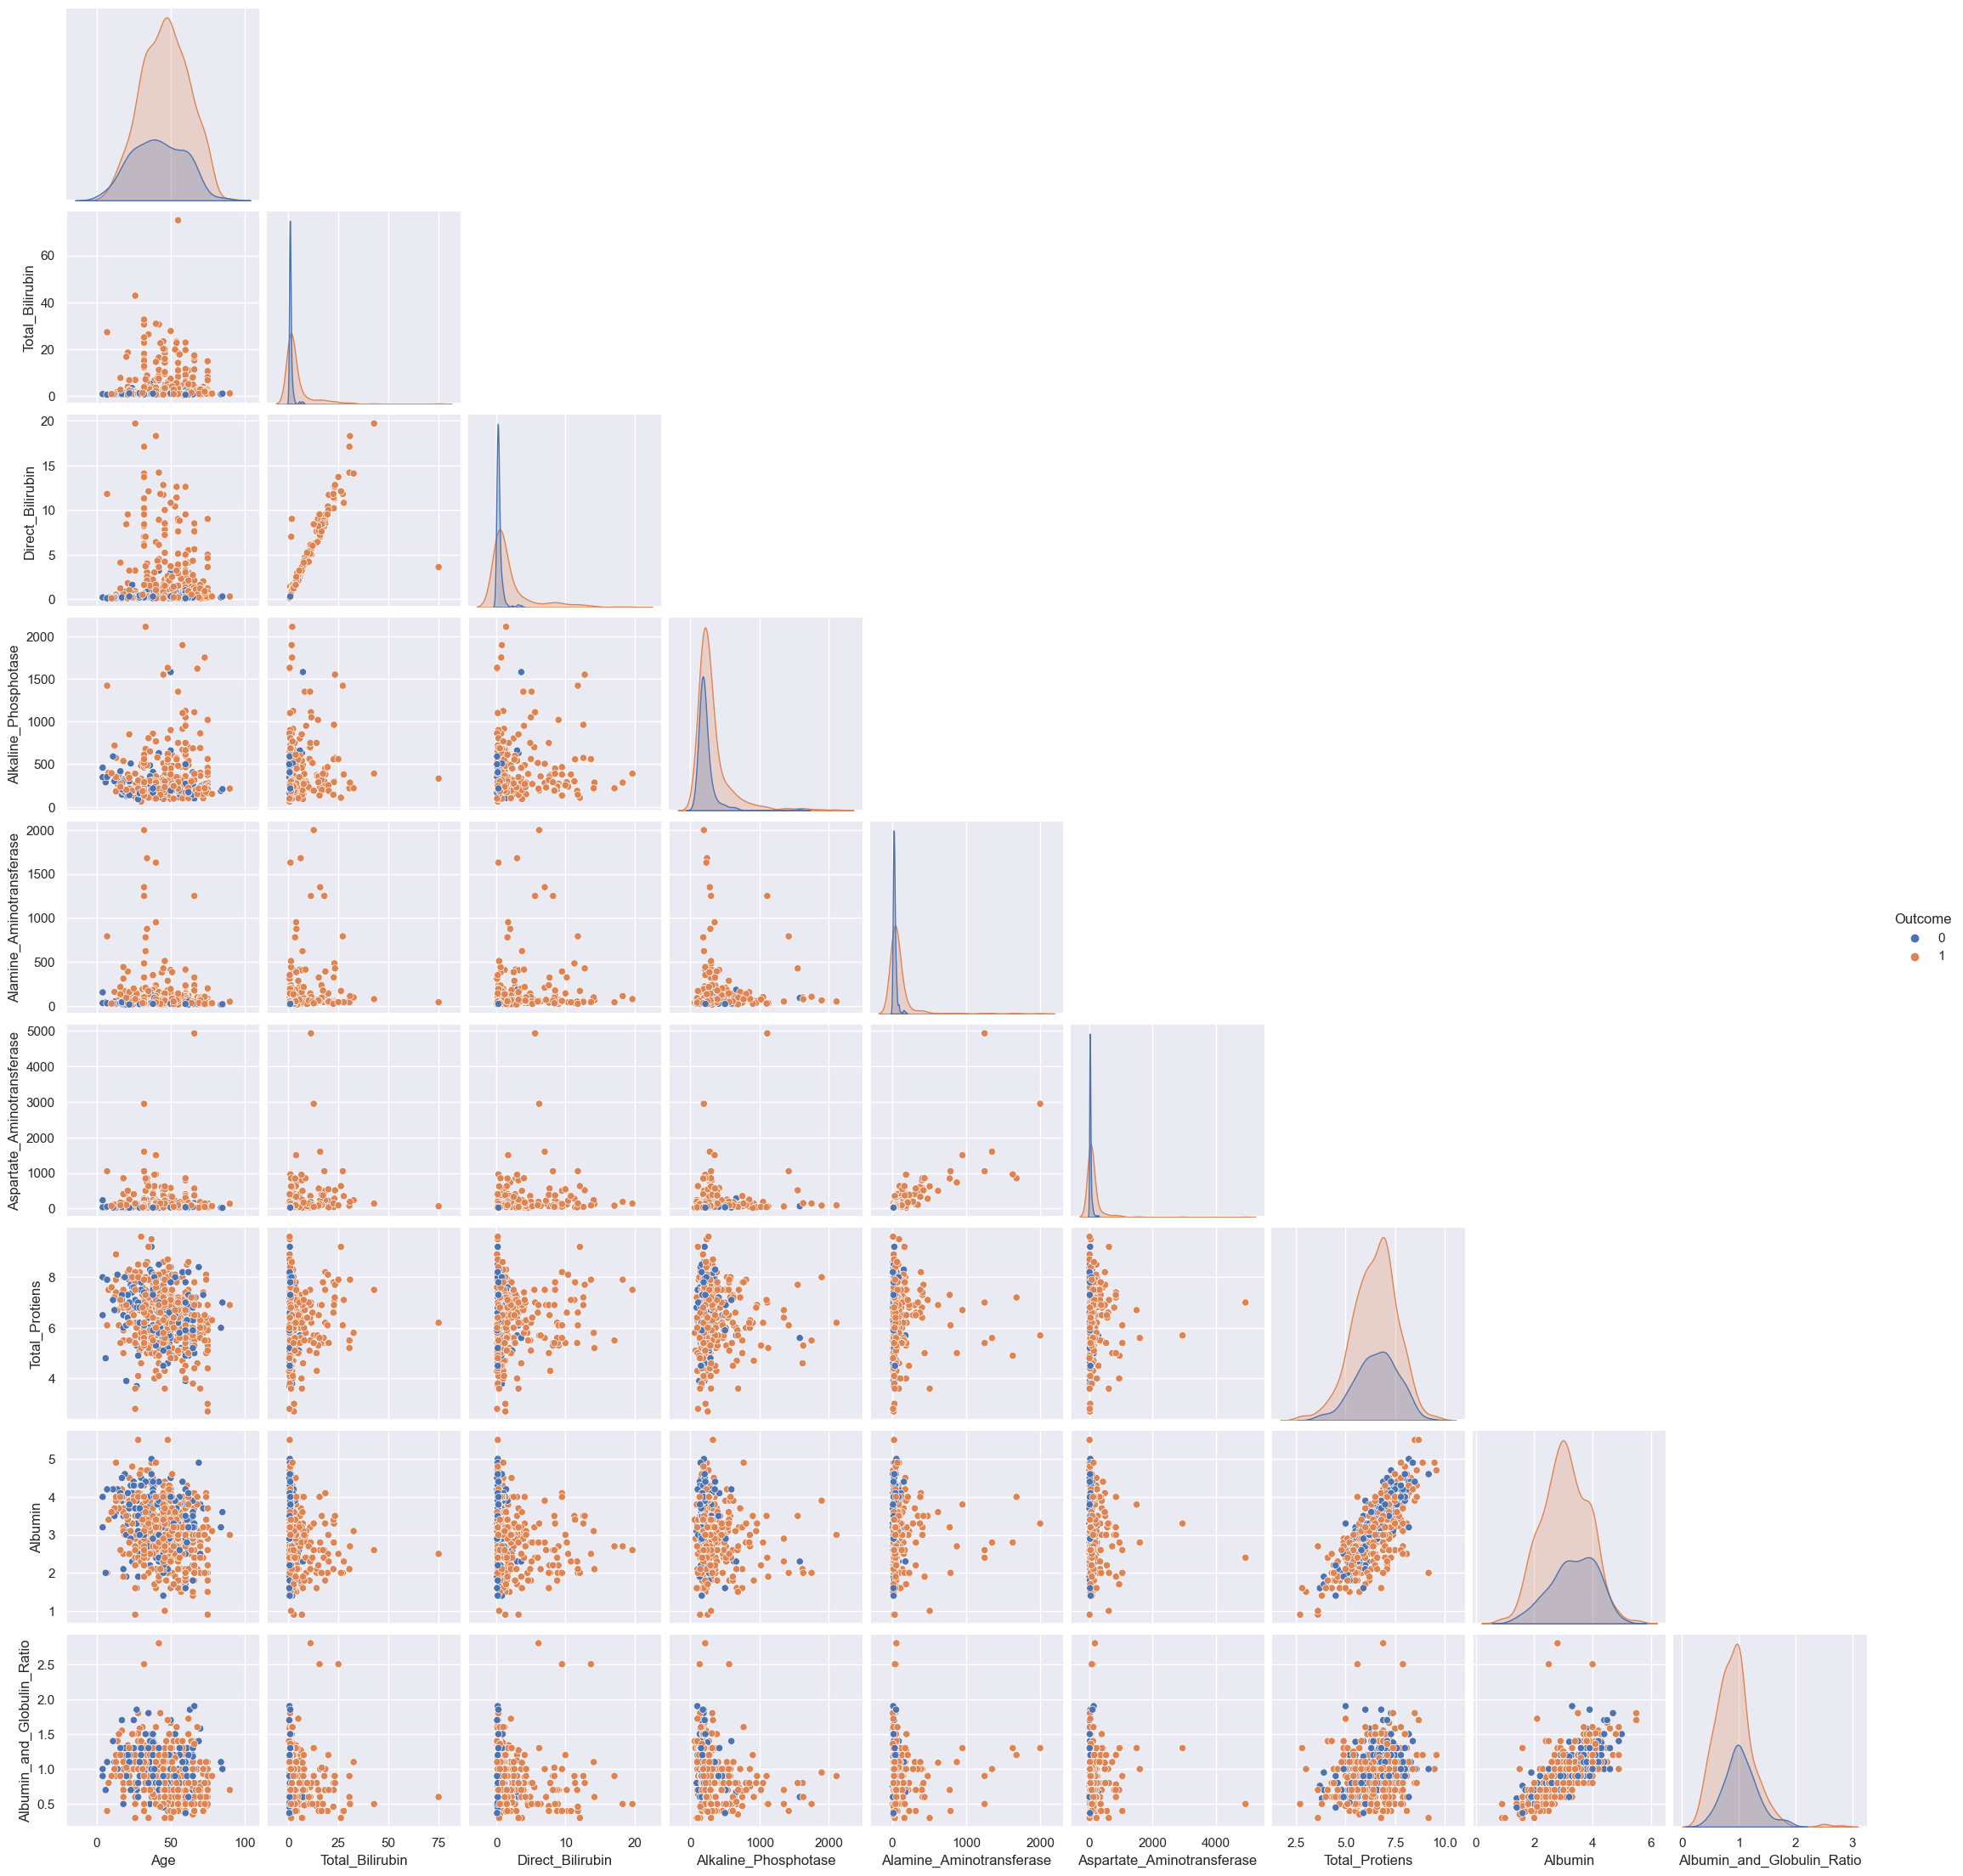

In [40]:
sns.pairplot(data = numerical_outcome, hue = 'Outcome', corner = True, diag_kind = 'kde')

### After analyzing the distributions and outliers, I do not remove outliers because they can indicate disease and are unlikely to be errors.

Text(0.5, 1.0, 'Heatmap correlation')

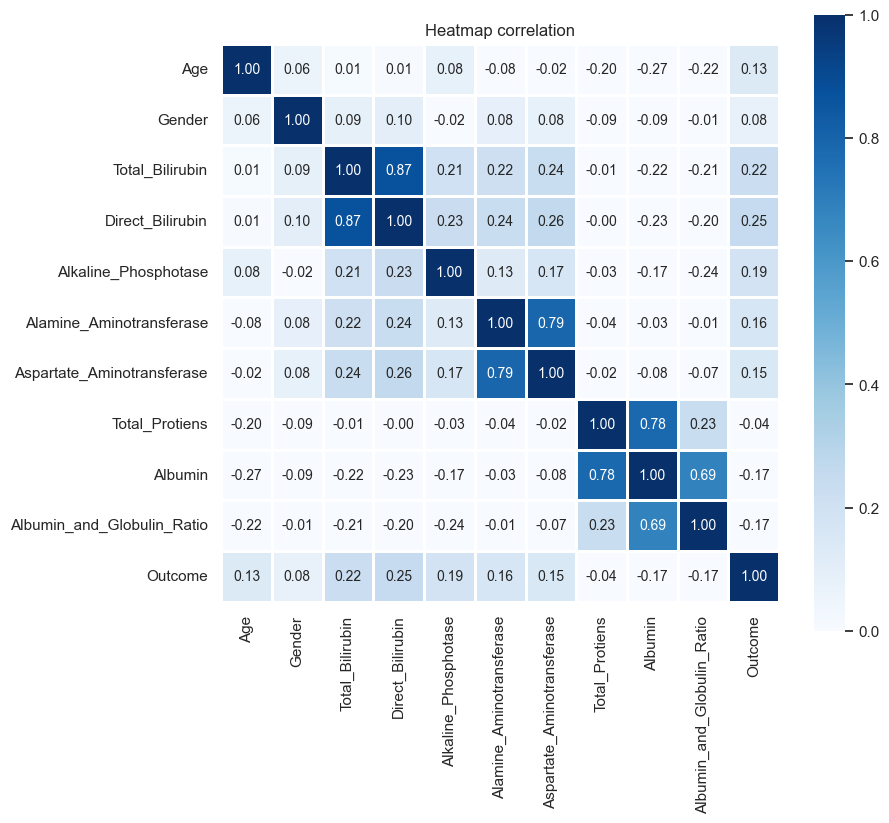

In [41]:
corr = liver.corr()
plt.figure(figsize = (9, 8))
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Correlation between Direct_Bilirubin and Total_Bilirubin (0.87), Aspartate_Aminotransferase and Alamine_Aminotransferase (0.79), Albumin and Total_Protiens (0.78), Albumin and Albumin_and_Globulin_Ratio (0.69).

In [43]:
liver.to_csv('liver_final.csv', index=False)

### End of analysis.